**Amazon Fine Food Reviews by applying Natural Language Processing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('Reviews.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.shape

(568454, 10)

In [6]:
def partition(x):
    if x < 3 :
        return 0
    return 1



df['Sentiment'] = df['Score'].apply(partition)
print(df['Sentiment'].shape) 
print(df.head(3))

(568454,)
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   

   Sentiment  
0          1  
1          0  
2          1  


In [7]:
duplicate_df= df[df.duplicated(subset = ['ProductId', 'ProfileName', 'Score', 'Time','Summary'], keep =  False)]

In [8]:
duplicate_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
466,467,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,0,0,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",1
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",1
1084,1085,B0030N5K1I,A19U4T4I7UZGNM,3 dogs,3,3,1,1330992000,awful,"This is not jerky, this is processed, hard lik...",0
1087,1088,B0030N5K1I,A19U4T4I7UZGNM,3 dogs,1,1,1,1330992000,awful,"This is not jerky, this is processed, hard lik...",0
2630,2631,B0016FY6H6,A2NLZ3M0OJV9NX,Mark Bodzin,1,1,2,1313107200,Way too weak for my tastes,"What can i say, I love iced tea. I drink a lot...",0
...,...,...,...,...,...,...,...,...,...,...,...
568007,568008,B0030VJ8YU,A20P8VC55KPPCT,FL Mom,3,3,5,1274486400,These pouches are great!,These pouches are so easy and convenient. They...,1
568008,568009,B0030VJ8YU,ATIHDHZYNQ0EI,"Kristen O'donnell ""twinsmom""",3,3,5,1270425600,Organic and Tasty!,I have 12 month olds and no time to write a gr...,1
568017,568018,B0030VJ8YU,A20P8VC55KPPCT,FL Mom,2,2,5,1274486400,These pouches are great!,These pouches are so easy and convenient. They...,1
568034,568035,B0030VJ8YU,A1S6HK2R1KUC5E,data1701,1,1,5,1318291200,Triplets love this!,This is very smooth and easy to feed to my tri...,1


In [9]:
duplicate_df.loc[df.ProductId== 'B005K4Q1VI', :]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
3306,3307,B005K4Q1VI,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",24,25,5,1321401600,Really Good Hot Cocoa - Highly Recommended,These Grove Square Hot Cocoa flavors are by fa...,1
3416,3417,B005K4Q1VI,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",5,5,5,1321401600,Really Good Hot Cocoa - Highly Recommended,These Grove Square Hot Cocoa flavors are by fa...,1


 **Data Cleaning**


In [10]:
sorted_df=df.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [11]:
final=sorted_df.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(393933, 11)

In [12]:
(final['Id'].size*1.0)/(df['Id'].size*1.0)*100

69.29901100176971

In [13]:
final[final['HelpfulnessNumerator'] > final['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...,1
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...,1


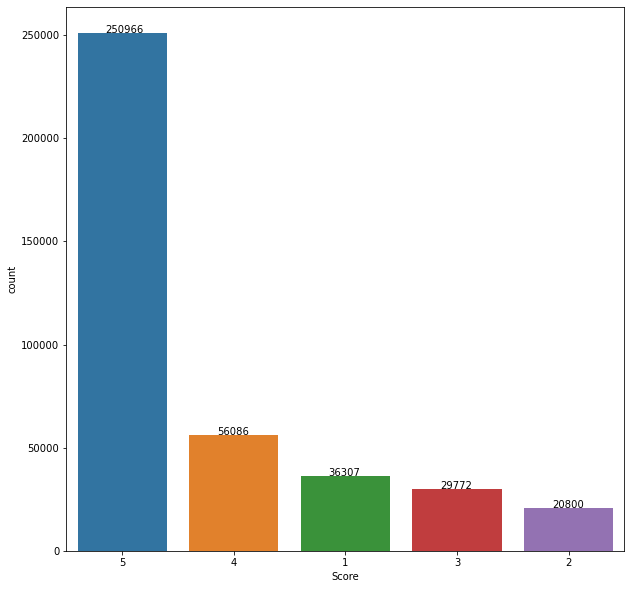

In [20]:
# Distribution of Score


plt.figure(figsize=(10,10))

ax = sns.countplot(x=final["Score"],  data=final, order = final["Score"].value_counts().index )
for p, label in zip(ax.patches, final["Score"].value_counts()):
#     print(p)
#     print(label)
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

In [14]:
final = final[final['HelpfulnessNumerator'] <= final['HelpfulnessDenominator']]
final.reset_index(inplace=True)
final.shape

(393931, 12)

**Score Evaluation**

In [21]:
final['Score']=final['Score'].apply(lambda x: 'positive' if x>3 else 'negative')

In [23]:
# unique values with respective counts
final['Score'].value_counts() 

positive    307052
negative     86879
Name: Score, dtype: int64

**Preprocessing**

In [19]:
import re
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:

import re

def decontracted(phrase):
    
    
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

   
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [18]:

from tqdm import tqdm
preprocessed_reviews = []

for sentance in tqdm(final['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|████████████████████████████████████████████████████████████████████████| 393931/393931 [02:35<00:00, 2531.37it/s]


In [19]:
preprocessed_reviews[2]

'grew reading sendak books watching really rosie movie incorporates love son loves however miss hard cover version paperbacks seem kind flimsy takes two hands keep pages open'

In [20]:
preprocessed_reviews[15000]

'catnip cute usable size larger expected catnip came clear plastic bag tied opening inside good amount cats went crazy'

In [21]:
len(preprocessed_reviews)

393931

**Featurization**

In [22]:
sample_df = final.sample(n = 5000)
sample_df.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
331776,497075,497076,B004E4EBMG,A1DH3QDZX8Z7GO,Charlemange,0,0,3,1325116800,"The most I taste it, the less I like it",This product comes in a cute little package ma...,1
38172,212091,212092,B000CNB4LE,A36NUOBYHZ79TX,"Joe Mclane ""Joe McLane""",5,9,4,1274745600,Better Than I Expected,"Pom is my favorite, but natural was much diffe...",1
249712,198616,198617,B002AQL00G,A137CU956U8KWF,J,5,5,3,1259539200,"Yummy out of the oven, but crumble after cooling",I purchased Betty Crocker's Gluten Free Chocol...,1
214124,424278,424279,B001IZASY4,A1LXOB43O3KGUL,"G. Andrews Jr. ""RR geek""",0,0,4,1330214400,good delivery,This company delivered as promised. No complai...,1
59311,381757,381758,B000EVIDV8,AA5V2LTBM580Y,Cecelia M. Munger,1,1,2,1182816000,A little grainy,We thought this cookie mix was a little bit gr...,0


In [23]:
sample_df.drop(columns = ['Id', 'ProductId', 'UserId','ProfileName', 'Time', 'Summary', 'Score'], inplace=True)

In [24]:
sample_df.head(2)

,index,HelpfulnessNumerator,HelpfulnessDenominator,Text,Sentiment
331776,497075,0,0,This product comes in a cute little package ma...,1
38172,212091,5,9,"Pom is my favorite, but natural was much diffe...",1


In [25]:
sample_df.index.values

array([331776,  38172, 249712, ..., 259872,    623,  14141], dtype=int64)

In [26]:
sample_reviews = [ preprocessed_reviews[i] for i in sample_df.index.values]
sample_reviews[0]

'product comes cute little package makes easy squeeze little time flavor not bad artificial sweetener makes taste weird would probably better flavored without sweetener not fan sodas super sweet drinks good thing control amount want use little bit goes long way drink lot water put drops bottle liked first fake sweetener really putting got tired quickly'

In [27]:
sample_df['preprocessed'] = sample_reviews
sample_df.head()

,index,HelpfulnessNumerator,HelpfulnessDenominator,Text,Sentiment,preprocessed
331776,497075,0,0,This product comes in a cute little package ma...,1,product comes cute little package makes easy s...
38172,212091,5,9,"Pom is my favorite, but natural was much diffe...",1,pom favorite natural much different better exp...
249712,198616,5,5,I purchased Betty Crocker's Gluten Free Chocol...,1,purchased betty crocker gluten free chocolate ...
214124,424278,0,0,This company delivered as promised. No complai...,1,company delivered promised no complaints packa...
59311,381757,1,1,We thought this cookie mix was a little bit gr...,0,thought cookie mix little bit grainy tasting a...


In [28]:
sample_df.drop(columns = ['Text', 'index'], inplace=True)

In [29]:
sample_df.head(3)

,HelpfulnessNumerator,HelpfulnessDenominator,Sentiment,preprocessed
331776,0,0,1,product comes cute little package makes easy s...
38172,5,9,1,pom favorite natural much different better exp...
249712,5,5,1,purchased betty crocker gluten free chocolate ...


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
y = sample_df['Sentiment'].values 
X = sample_df.drop(columns =['Sentiment'])

print(X.shape)
print(y.shape)

(5000, 3)
(5000,)


In [32]:
sample_df['Sentiment'].value_counts()

1    4279
0     721
Name: Sentiment, dtype: int64

In [33]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 24)

print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(4000, 3)
(4000,)
(1000, 3)
(1000,)


**BOW**

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
count_vect.fit(train_X['preprocessed'])

print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

some feature names  ['aaa', 'aafco', 'aamazon', 'aand', 'abandoned', 'abdominal', 'abilities', 'ability', 'able', 'abnormal']


In [35]:
final_vectors = count_vect.transform(train_X['preprocessed'])

In [36]:
final_vectors.shape

(4000, 12669)

In [37]:
num_feats = train_X[['HelpfulnessNumerator' ,	'HelpfulnessDenominator']].values

from scipy import sparse

training_df = sparse.hstack(( num_feats, final_vectors))

training_df.shape

(4000, 12671)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression(max_iter = 15000)

model.fit(training_df, train_y)

LogisticRegression(max_iter=15000)

In [40]:

final_test_vectors = count_vect.transform(test_X['preprocessed'].values)
final_test_vectors.shape

(1000, 12669)

In [41]:
test_feats = test_X[['HelpfulnessNumerator' ,	'HelpfulnessDenominator']].values

test_df = sparse.hstack(( test_feats, final_test_vectors))

test_df.shape


(1000, 12671)

In [42]:
from sklearn.metrics import accuracy_score

preds = model.predict(test_df)


y_true = test_y

accuracy_score(y_true, preds)

0.872